# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [27]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

### `.shape` represent rows and columns


In [4]:
df_tesla.shape

(124, 3)

### column names with `.columns`

In [5]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

### f-string to show smallest and largets on 'TSLA_WEB_SEARCH'


In [6]:
print(f"Largest:\t{df_tesla['TSLA_WEB_SEARCH'].max()}\nSmalest:\t{df_tesla['TSLA_WEB_SEARCH'].min()}")

Largest:	31
Smalest:	2


### use `.describe()` instead.


In [7]:
df_tesla['TSLA_WEB_SEARCH'].describe().to_frame()

,TSLA_WEB_SEARCH
count,124.00
mean,8.73
std,5.87
min,2.00
25%,3.75
50%,8.00
75%,12.00
max,31.00


### find out about periodicity 

In [8]:
df_tesla['MONTH'].head()

0    2010-06-01
1    2010-07-01
2    2010-08-01
3    2010-09-01
4    2010-10-01
Name: MONTH, dtype: object

In [9]:
print(f'Largest value for Tesla in Web Search:\t{df_tesla['TSLA_WEB_SEARCH'].max()}')
print(f'Smallest value for Tesla in Web Search:\t{df_tesla['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search:	31
Smallest value for Tesla in Web Search:	2


### Unemployment Data

In [10]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.70
1,2004-02,33,5.60
2,2004-03,25,5.80
3,2004-04,29,5.60
4,2004-05,23,5.60
...,...,...,...
176,2018-09,14,3.70
177,2018-10,15,3.80
178,2018-11,16,3.70
179,2018-12,17,3.90


In [11]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [12]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.33,"21,056,800.00"
1,2014-09-18,424.44,"34,483,200.00"
2,2014-09-19,394.80,"37,919,700.00"
3,2014-09-20,408.90,"36,863,600.00"
4,2014-09-21,398.82,"26,580,100.00"


In [13]:
df_btc_search.tail()

,MONTH,BTC_NEWS_SEARCH
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16
72,2020-09,13


In [14]:
print(f'largest BTC News Search:\t{df_btc_search['BTC_NEWS_SEARCH'].max()}')

largest BTC News Search:	100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [15]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [16]:
print(f'Missing values for BTC price?: ')

Missing values for BTC price?: 


In [17]:
print(f'Number of missing values: ')

Number of missing values: 


**Challenge**: Remove any missing values that you found. 

In [18]:
for name, df in {'TSLA': df_tesla, 'BTC PRICE':df_btc_price, 'BTC SEARCH': df_btc_search, 'UNEMPLOYMENT': df_unemployment}.items():
    if df.isna().values.any():
        print(f"{name} with shape \t {df.shape}")
        print(f"{df[df.isna().values == True]}")
        print('using `dropna()` on it...')
        print(df.shape)
        df = df.dropna(inplace= True)
        print(f"{name} cleaned.")
    else:
        print(f"{name} is clear...")

TSLA is clear...
BTC PRICE with shape 	 (2204, 3)
            DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN
2148  2020-08-04    NaN     NaN
using `dropna()` on it...
(2204, 3)
BTC PRICE cleaned.
BTC SEARCH is clear...
UNEMPLOYMENT is clear...


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [19]:
for name, df in {'TSLA': df_tesla, 'BTC PRICE':df_btc_price, 'BTC SEARCH': df_btc_search, 'UNEMPLOYMENT': df_unemployment}.items():
    print(f"df name:==>\t{name}")
    print(f"dtype of time column:==>\t{type(df.iloc[:, 0][0])}\nactuall value in column:==>\t{df.iloc[:, 0][0]}\n")

df name:==>	TSLA
dtype of time column:==>	<class 'str'>
actuall value in column:==>	2010-06-01

df name:==>	BTC PRICE
dtype of time column:==>	<class 'str'>
actuall value in column:==>	2014-09-17

df name:==>	BTC SEARCH
dtype of time column:==>	<class 'str'>
actuall value in column:==>	2014-09

df name:==>	UNEMPLOYMENT
dtype of time column:==>	<class 'str'>
actuall value in column:==>	2004-01



In [20]:
print("converting all time columns to datetime objs:")
df_tesla.iloc[:, 0] = pd.to_datetime(df_tesla.iloc[:, 0])
df_btc_price.iloc[:, 0] = pd.to_datetime(df_btc_price.iloc[:, 0])
df_btc_search.iloc[:, 0] = pd.to_datetime(df_btc_search.iloc[:, 0])
df_unemployment.iloc[:, 0] = pd.to_datetime(df_unemployment.iloc[:, 0])

converting all time columns to datetime objs:


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [21]:
df_btc_price_monthly = df_btc_price.resample(rule= 'ME', on= df_btc_price.columns[0]).last()
df_btc_price_monthly

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.94,"34,707,300.00"
2014-10-31,338.32,"12,545,400.00"
2014-11-30,378.05,"9,194,440.00"
2014-12-31,320.19,"13,942,900.00"
2015-01-31,217.46,"23,348,200.00"
...,...,...
2020-05-31,"9,461.06","27,773,290,298.00"
2020-06-30,"9,137.99","15,735,797,743.00"
2020-07-31,"11,323.47","23,160,469,766.00"


# Data Visualisation

### Notebook Formatting & Style Helpers

In [29]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
month = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [23]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

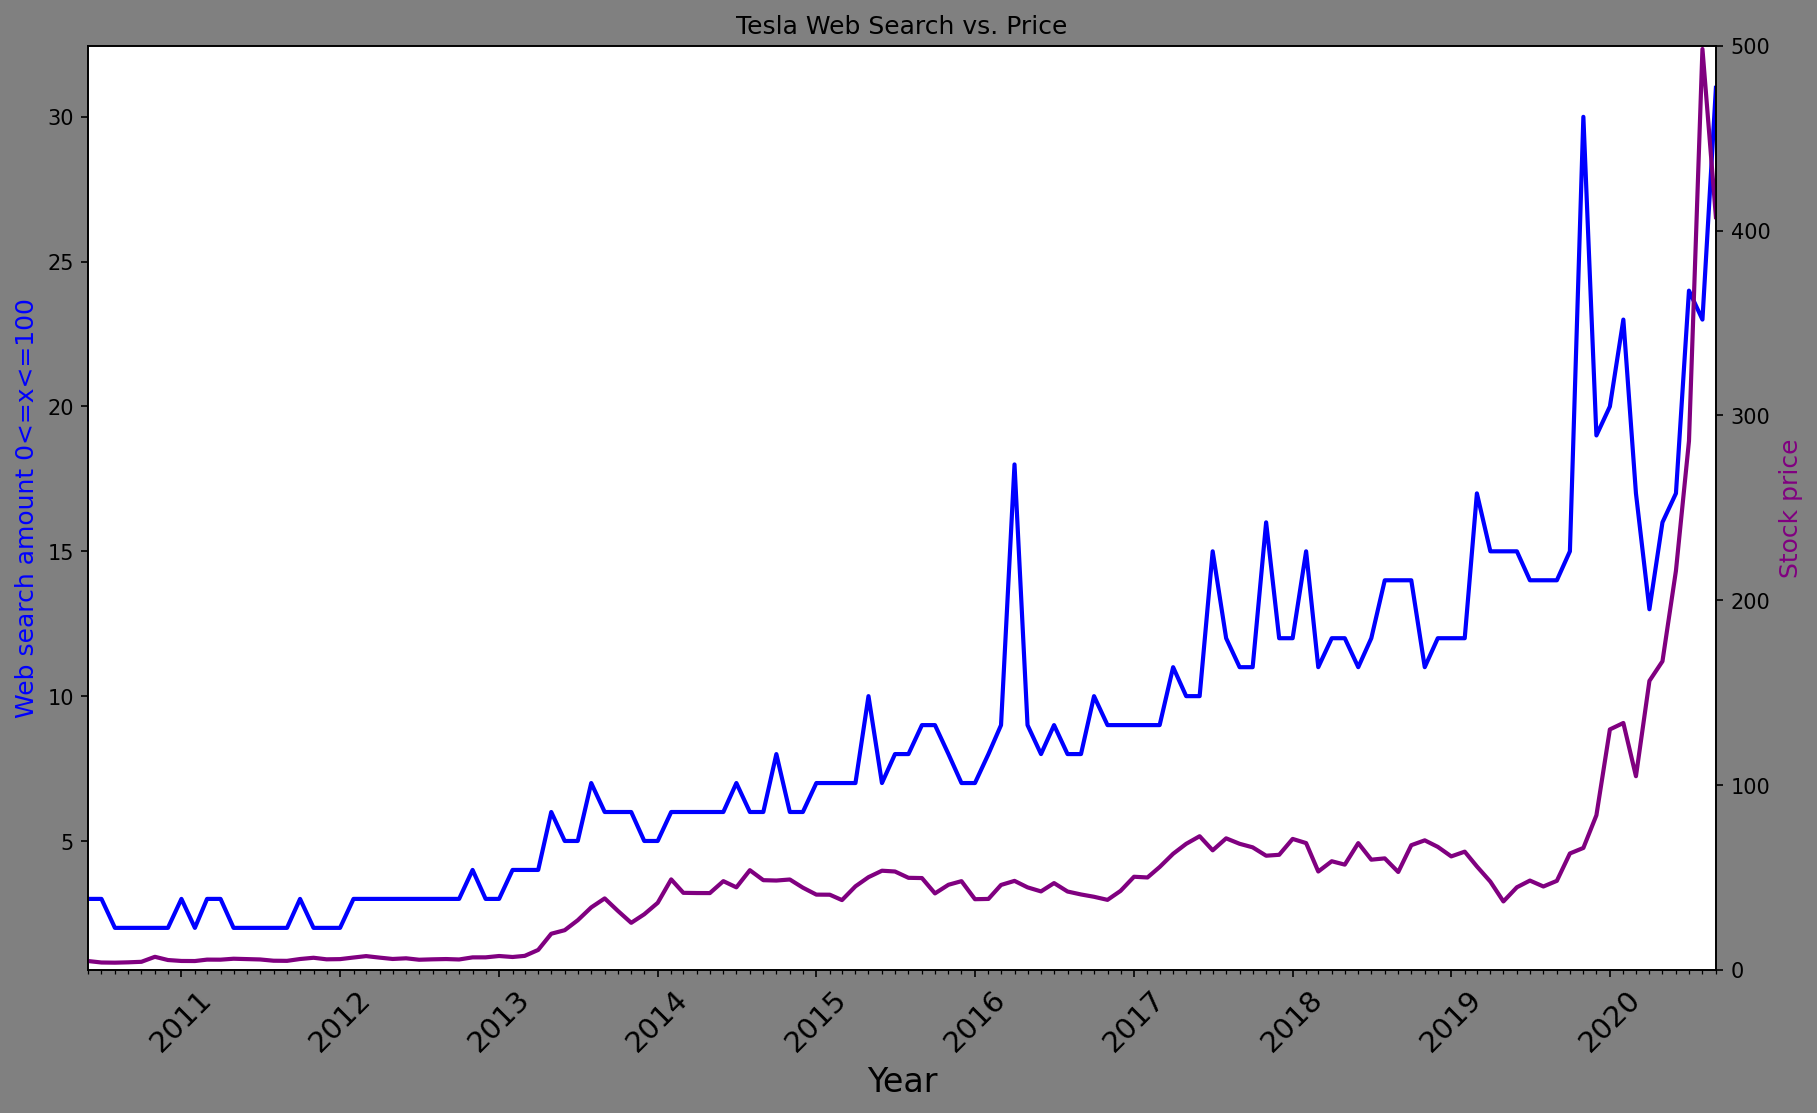

In [37]:
plt.subplots(figsize= (14, 8), dpi= 150, facecolor= 'gray', )
plt.xticks(fontsize= 14, rotation= 45)
plt.title("Tesla Web Search vs. Price")
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)

ax1.plot(
    df_tesla['MONTH'],
    df_tesla['TSLA_WEB_SEARCH'],
    color= 'blue',
    linewidth= 2
)
ax2.plot(
    df_tesla['MONTH'],
    df_tesla['TSLA_USD_CLOSE'],
    color= 'purple',
    linewidth= 2
)
ax1.set_xlabel("Year", fontsize= 16)
ax1.set_ylabel("Web search amount 0<=x<=100", color= 'blue', fontsize= 12)
ax2.set_ylabel("Stock price", color= 'purple', fontsize= 12)

plt.xlim(df_tesla['MONTH'].min(), df_tesla['MONTH'].max())
plt.ylim(0, 500)

plt.show()



### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

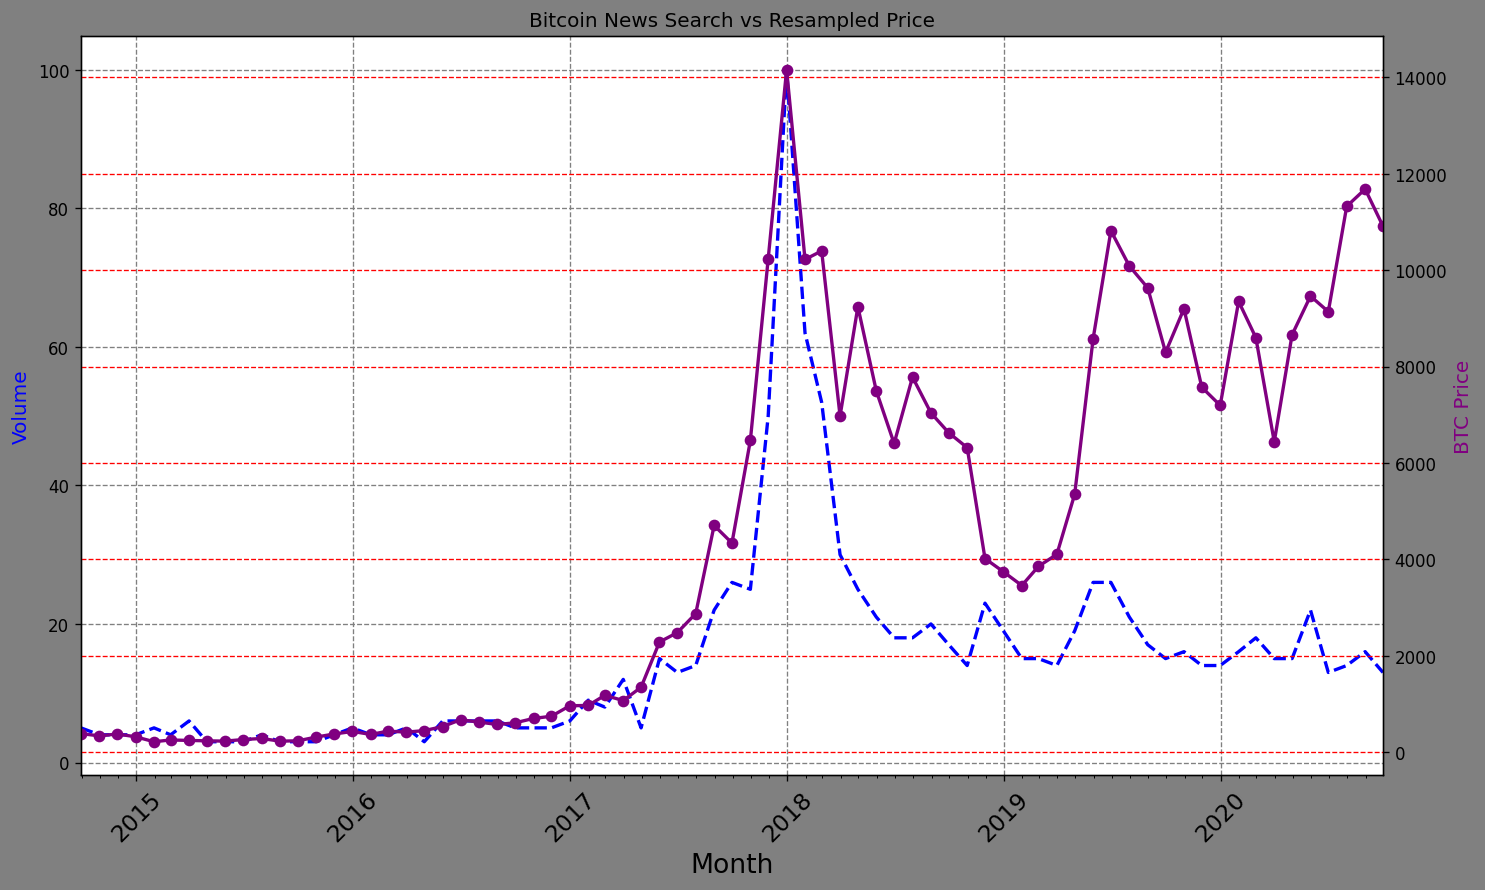

In [47]:
plt.subplots(figsize= (14, 8), dpi= 120, facecolor= 'gray', )
plt.xticks(fontsize= 14, rotation= 45)
plt.title("Bitcoin News Search vs Resampled Price")
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)

ax1.plot(
    df_btc_price_monthly.index,
    df_btc_search['BTC_NEWS_SEARCH'],
    color= 'blue',
    linewidth= 2,
    linestyle='dashed'
)
ax2.plot(
    df_btc_price_monthly.index,
    df_btc_price_monthly['CLOSE'],
    color= 'purple',
    linewidth= 2,
    marker='o',
)
ax1.set_xlabel("Month", fontsize= 16)
ax1.set_ylabel("Volume", color= 'blue', fontsize= 12)
ax2.set_ylabel("BTC Price", color= 'purple', fontsize= 12)

ax1.grid(color='grey', linestyle='--')
plt.grid(color='red', linestyle='--')

ax1.set_xlim(
    [df_btc_price_monthly.index.min(), df_btc_price_monthly.index.max()]
)

plt.show()



### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?